In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('train_features.csv')

X = train_df.drop('label', axis=1)
y = train_df['label']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

test_df = pd.read_csv('test_features.csv')

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']
X_test = scaler.transform(X_test)

import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [4]:
class_names = train_df['label'].unique()

In [5]:
train_df.shape

(11480, 16)

In [6]:
test_df.shape

(3280, 16)

In [7]:
def results(y_pred, y_test, labels):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: ', accuracy)
    precision = precision_score(y_test, y_pred, average='weighted')
    print('Precision: ', precision)
    recall = recall_score(y_test, y_pred, average='weighted')
    print('Recall: ', recall)
    f1 = 2 * (precision * recall) / (precision + recall)
    print('F1 Score: ', f1)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    true_positive = np.diag(conf_matrix)
    true_positive_rate = true_positive / np.sum(conf_matrix, axis=1)
    print('True Positive Rate: ', true_positive_rate)

    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g')  # 'g' format ensures that integers are displayed properly

    # Setting labels, title and ticks
    plt.ylabel('Actual', fontsize=12)
    plt.title('Confusion Matrix', fontsize=15)
    plt.xticks(np.arange(len(labels)) + 0.5, labels, rotation=45, ha='right')  # Adjust tick positions and labels
    plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=0)

# SVM

Accuracy:  0.21310975609756097
Precision:  0.2140587035478608
Recall:  0.21310975609756097
F1 Score:  0.21358317578741978
True Positive Rate:  [0.06097561 0.33536585 0.23780488 0.24390244 0.27439024 0.16463415
 0.18902439 0.23170732 0.26829268 0.29268293 0.08536585 0.13414634
 0.23780488 0.3597561  0.01219512 0.18292683 0.09146341 0.27439024
 0.30487805 0.2804878 ]


['svm.pkl']

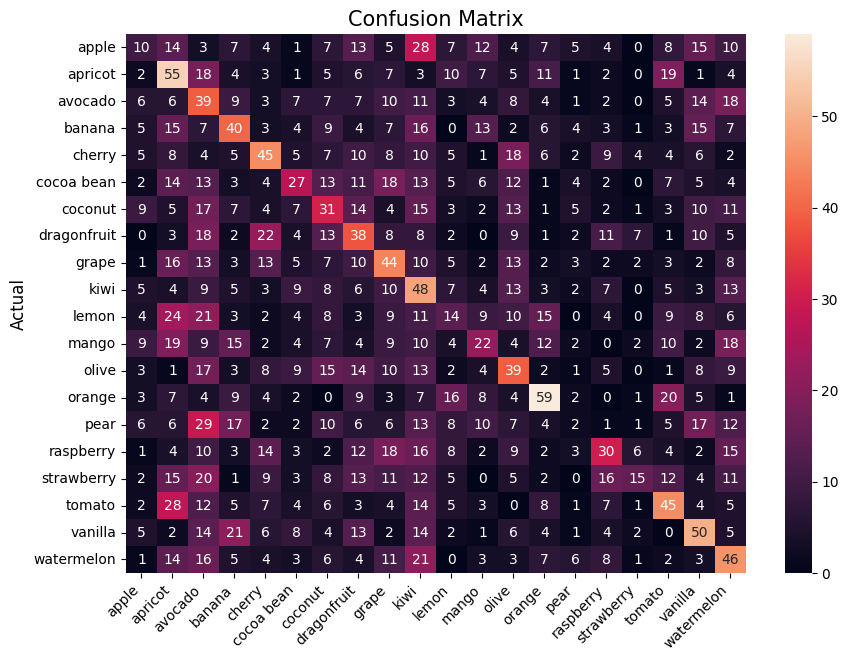

In [8]:
#train svm model
from sklearn import svm
from sklearn.model_selection import train_test_split

clf = svm.SVC(kernel='rbf', C=200, gamma='auto', probability=True)
clf.fit(X, y)

y_pred = clf.predict(X_test)

results(y_pred, y_test, class_names)

joblib.dump(clf, 'svm.pkl')

# RANDOM FOREST

Accuracy:  0.2225609756097561
Precision:  0.2127496454396904
Recall:  0.2225609756097561
F1 Score:  0.21754474327107576
True Positive Rate:  [0.07317073 0.26829268 0.19512195 0.26829268 0.34756098 0.18902439
 0.17682927 0.28658537 0.2195122  0.14634146 0.07317073 0.10365854
 0.29878049 0.43292683 0.07317073 0.17682927 0.18902439 0.23170732
 0.42073171 0.2804878 ]


['random_forest.pkl']

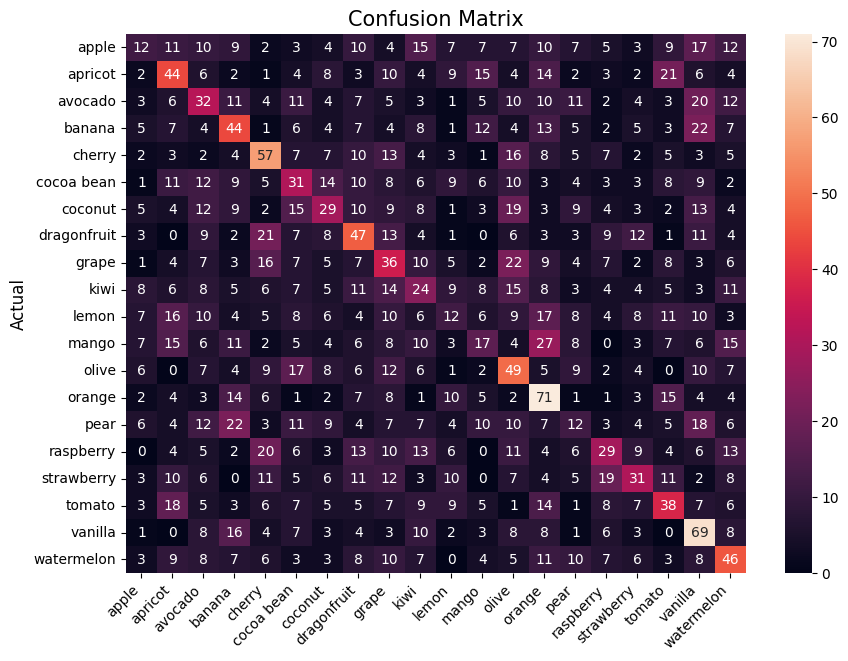

In [9]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=3000, max_depth=25, random_state=42, criterion='gini', 
                             min_samples_split=2, min_samples_leaf=5, n_jobs=-1)
clf.fit(X, y)

y_pred = clf.predict(X_test)

results(y_pred, y_test, class_names)

joblib.dump(clf, 'random_forest.pkl')

# KNN

Accuracy:  0.17560975609756097
Precision:  0.18544546595513978
Recall:  0.17560975609756097
F1 Score:  0.1803936409540544
True Positive Rate:  [0.20121951 0.32926829 0.18292683 0.21341463 0.26829268 0.18902439
 0.1402439  0.19512195 0.18292683 0.18292683 0.06097561 0.10365854
 0.12804878 0.30487805 0.07317073 0.13414634 0.16463415 0.13414634
 0.21341463 0.1097561 ]


['knn.pkl']

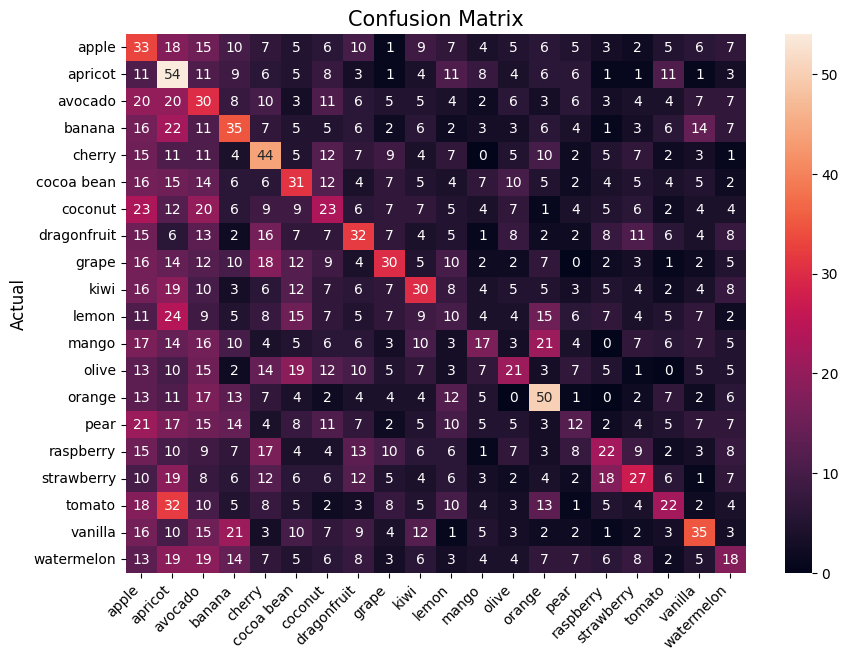

In [10]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
clf.fit(X, y)

y_pred = clf.predict(X_test)

results(y_pred, y_test, class_names)

joblib.dump(clf, 'knn.pkl')

# XGBOOST

Accuracy:  0.19207317073170732
Precision:  0.1902536954938273
Recall:  0.19207317073170732
F1 Score:  0.1911591037150272
True Positive Rate:  [0.07317073 0.20731707 0.17682927 0.20121951 0.26829268 0.15853659
 0.10365854 0.19512195 0.18902439 0.15853659 0.10365854 0.16463415
 0.2195122  0.34146341 0.18292683 0.17682927 0.16463415 0.18902439
 0.34756098 0.2195122 ]


['xgb_label_encoder.pkl']

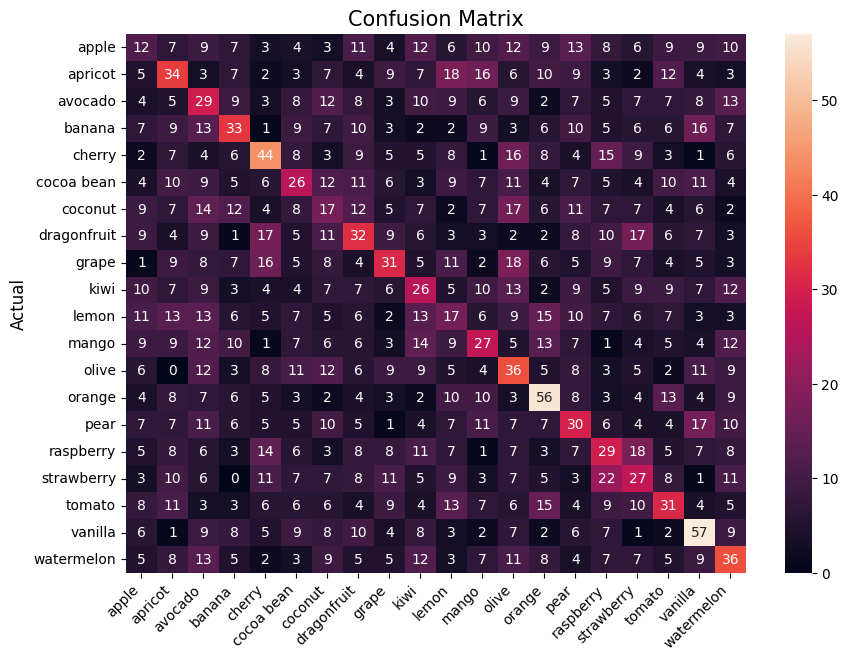

In [11]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

xgb20_label_encoder = LabelEncoder()
y_encoded = xgb20_label_encoder.fit_transform(y)

clf = XGBClassifier(n_estimators=4000, max_depth=30, random_state=42, n_jobs=-1)
clf.fit(X, y_encoded)

y_pred = clf.predict(X_test)

y_test_encoded = xgb20_label_encoder.transform(y_test)

labels_for_plot_xgb20 = xgb20_label_encoder.inverse_transform(sorted(np.unique(y_encoded)))
results(y_pred, y_test_encoded, labels_for_plot_xgb20)

import joblib

joblib.dump(clf, 'xgb.pkl')
joblib.dump(xgb20_label_encoder, 'xgb_label_encoder.pkl')

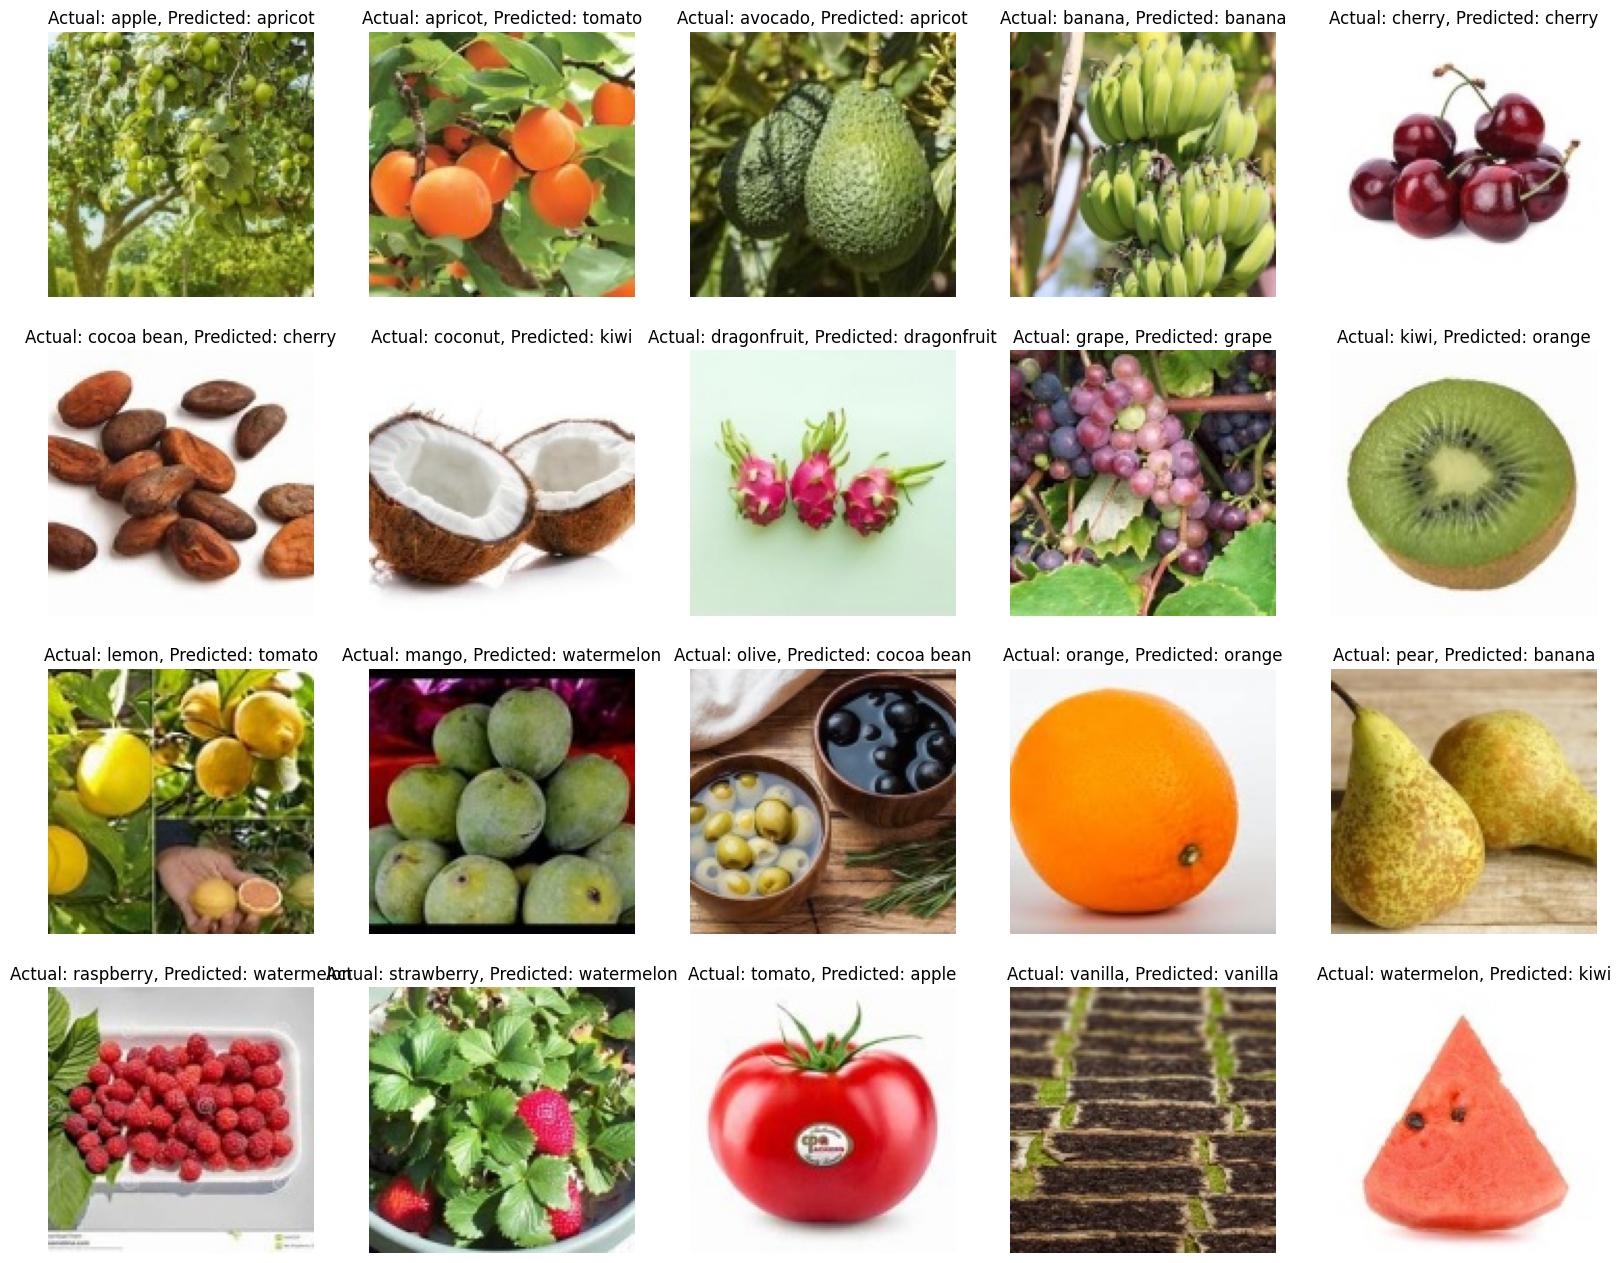

In [22]:
import os
import random
import matplotlib.pyplot as plt
import cv2
from feature_extraction import single_image_feature
import joblib
import warnings

warnings.filterwarnings('ignore')

# Set the path to the test images directory
test_images_dir = "data_128x128/test"

class_folders = os.listdir(test_images_dir)

model = joblib.load('random_forest.pkl')
scaler = joblib.load('scaler.pkl')


# Randomly select images from each class
selected_images = []
for class_folder in class_folders:
    class_images = os.listdir(os.path.join(test_images_dir, class_folder))
    selected_image = random.choice(class_images)
    selected_images.append((class_folder, selected_image))

# Extract features from the selected images
plt.figure(figsize=(20, 20))

for class_folder, image_name in selected_images:
    image_path = os.path.join(test_images_dir, class_folder, image_name)
    image = cv2.imread(image_path)
    feature = single_image_feature(image, class_folder)
    label = feature[-1]
    feature = feature[:-1]
    feature = scaler.transform([feature])
    prediction = model.predict(feature)
    prediction = prediction[0]
    plt.subplot(5,5, selected_images.index((class_folder, image_name)) + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Actual: {label}, Predicted: {prediction}')
    plt.axis('off')

plt.show()